<a href="https://colab.research.google.com/github/Ugo5738/Convolutional-Neural-Networks-Projects/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies

In [ ]:
!pip install xmltodict

In [ ]:
# load and prepare face mask dataset and save to file
from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import savez_compressed
from pandas import read_csv
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
import xmltodict
import pandas as pd
import numpy as np
import os
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path

plt.style.use(['seaborn-white'])

In [ ]:
# test f-beta score
from numpy import load
from numpy import ones
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score

In [ ]:
import tensorflow as tf

# Download Dataset from Kaggle

In [ ]:
!pip install --quiet kaggle

# upload the kaggle.json file from your local system
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ugochukwunwachukwu","key":"bf40d33f01a1437a69ae5fb2505e2f7e"}'}

In [ ]:
# make the /.kaggle directory
!mkdir -p ~/.kaggle

# copy the kaggle.json file into the /.kaggle directory
!cp kaggle.json ~/.kaggle
# check the files in the /.kaggle directory

!ls /root/.kaggle/
# check the file permission 

!ls -l ~/.kaggle/kaggle.json
# change file permission
# chmod 600 - owner can write and read
# chmod 700 - owner can write, read and execute

!chmod 600 ~/.kaggle/kaggle.json

kaggle.json
-rw-r--r-- 1 root root 74 Mar 29 22:19 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list -s 'Face Mask Detection'

ref                                                              title                                                size  lastUpdated          downloadCount  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
andrewmvd/face-mask-detection                                    Face Mask Detection                                 398MB  2020-05-22 07:18:42          14382  
wobotintelligence/face-mask-detection-dataset                    Face Mask Detection Dataset                           2GB  2020-06-14 19:06:22           4913  
omkargurav/face-mask-dataset                                     Face Mask Detection Dataset                         163MB  2020-07-31 18:34:42           2042  
prithwirajmitra/covid-face-mask-detection-dataset                COVID Face Mask Detection Dataset                   207MB  2020-07-15 16:57:21           2469  
prasoonkottarathil/face-mask-lite-

In [ ]:
!kaggle datasets download -d andrewmvd/face-mask-detection 

 99% 393M/398M [00:08<00:00, 57.5MB/s]
100% 398M/398M [00:08<00:00, 47.6MB/s]


# Unzip Dataset into working directories

In [ ]:
import os
import zipfile

base_dir = '/content/face-mask-detection.zip'
zip_ref = zipfile.ZipFile(base_dir, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Data Wrangling

In [ ]:
train_dir = '/tmp/'
os.listdir(train_dir)

['annotations',
 'initgoogle_syslog_dir.0',
 'debugger_k434aqlv5',
 'images',
 'dap_multiplexer.a301718f6b6a.root.log.INFO.20210329-221524.49',
 'dap_multiplexer.INFO']

In [ ]:
train_annotation_dir = os.path.join(train_dir, "annotations")
train_image_dir = os.path.join(train_dir, "images")

In [ ]:
data = []
sorted_annot_list = sorted(os.listdir(train_annotation_dir), key=lambda x: int(x.split('.')[0][12:]))

for f_name in tqdm(sorted_annot_list):
    with open(os.path.join(train_annotation_dir, f_name), 'r') as file:
        annot = xmltodict.parse(file.read())['annotation'] # read the annotation xml file
        if type(annot['object']) != list: # if the items in annot['object'] is not a list
            annot['object'] = [annot['object']] # convert it to a list
        data.append(annot) # add the list to the data list
print(data)

data_df = pd.json_normalize(data) # Normalize semi-structured JSON data into a flat table
data_df


[OrderedDict([('folder', 'images'), ('filename', 'maksssksksss0.png'), ('size', OrderedDict([('width', '512'), ('height', '366'), ('depth', '3')])), ('segmented', '0'), ('object', [OrderedDict([('name', 'without_mask'), ('pose', 'Unspecified'), ('truncated', '0'), ('occluded', '0'), ('difficult', '0'), ('bndbox', OrderedDict([('xmin', '79'), ('ymin', '105'), ('xmax', '109'), ('ymax', '142')]))]), OrderedDict([('name', 'with_mask'), ('pose', 'Unspecified'), ('truncated', '0'), ('occluded', '0'), ('difficult', '0'), ('bndbox', OrderedDict([('xmin', '185'), ('ymin', '100'), ('xmax', '226'), ('ymax', '144')]))]), OrderedDict([('name', 'without_mask'), ('pose', 'Unspecified'), ('truncated', '0'), ('occluded', '0'), ('difficult', '0'), ('bndbox', OrderedDict([('xmin', '325'), ('ymin', '90'), ('xmax', '360'), ('ymax', '141')]))])])]), OrderedDict([('folder', 'images'), ('filename', 'maksssksksss1.png'), ('size', OrderedDict([('width', '400'), ('height', '156'), ('depth', '3')])), ('segmented

,folder,filename,segmented,object,size.width,size.height,size.depth
0,images,maksssksksss0.png,0,"[{'name': 'without_mask', 'pose': 'Unspecified...",512,366,3
1,images,maksssksksss1.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",400,156,3
2,images,maksssksksss2.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",400,290,3
3,images,maksssksksss3.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",400,271,3
4,images,maksssksksss4.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",301,400,3
...,...,...,...,...,...,...,...
848,images,maksssksksss848.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",400,268,3
849,images,maksssksksss849.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",400,236,3
850,images,maksssksksss850.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",400,200,3
851,images,maksssksksss851.png,0,"[{'name': 'with_mask', 'pose': 'Unspecified', ...",301,400,3


In [ ]:
data_df['object'][0] # To see the structure of data in the first item in the object column

[OrderedDict([('name', 'without_mask'),
              ('pose', 'Unspecified'),
              ('truncated', '0'),
              ('occluded', '0'),
              ('difficult', '0'),
              ('bndbox',
               OrderedDict([('xmin', '79'),
                            ('ymin', '105'),
                            ('xmax', '109'),
                            ('ymax', '142')]))]),
 OrderedDict([('name', 'with_mask'),
              ('pose', 'Unspecified'),
              ('truncated', '0'),
              ('occluded', '0'),
              ('difficult', '0'),
              ('bndbox',
               OrderedDict([('xmin', '185'),
                            ('ymin', '100'),
                            ('xmax', '226'),
                            ('ymax', '144')]))]),
 OrderedDict([('name', 'without_mask'),
              ('pose', 'Unspecified'),
              ('truncated', '0'),
              ('occluded', '0'),
              ('difficult', '0'),
              ('bndbox',
               Orde

In [ ]:
data_df['object'] # To see the structure of data in the object column

0      [{'name': 'without_mask', 'pose': 'Unspecified...
1      [{'name': 'with_mask', 'pose': 'Unspecified', ...
2      [{'name': 'with_mask', 'pose': 'Unspecified', ...
3      [{'name': 'with_mask', 'pose': 'Unspecified', ...
4      [{'name': 'with_mask', 'pose': 'Unspecified', ...
                             ...                        
848    [{'name': 'with_mask', 'pose': 'Unspecified', ...
849    [{'name': 'with_mask', 'pose': 'Unspecified', ...
850    [{'name': 'with_mask', 'pose': 'Unspecified', ...
851    [{'name': 'with_mask', 'pose': 'Unspecified', ...
852    [{'name': 'with_mask', 'pose': 'Unspecified', ...
Name: object, Length: 853, dtype: object

In [ ]:
data_df['num_of_object'] = data_df.object.map(len) # to show how many labels a particular picture has
data_df['num_of_object'] 

0      3
1      9
2      4
3      9
4      1
      ..
848    4
849    4
850    3
851    1
852    2
Name: num_of_object, Length: 853, dtype: int64

In [ ]:
data_df[data_df.num_of_object <= 15].num_of_object.sum()

2984

In [ ]:
data_df = data_df[data_df.num_of_object <= 15]

In [ ]:
from itertools import chain

num_object_per_images = data_df.num_of_object

image_data = pd.DataFrame({
    'filename': np.repeat(data_df['filename'], num_object_per_images), 
    'segmented': np.repeat(data_df['segmented'], num_object_per_images), 
    'object': chain.from_iterable(data_df['object'].values), 
    'width': np.repeat(data_df['size.width'], num_object_per_images),
    'height': np.repeat(data_df['size.height'], num_object_per_images),
    'depth': np.repeat(data_df['size.depth'], num_object_per_images)
})
image_data.reset_index(inplace=True, drop=True)

In [ ]:
objects = pd.DataFrame(image_data.object.map(dict).tolist())

data = pd.concat([image_data, objects], axis=1)
data.drop(columns='object', inplace=True)

data

,filename,segmented,width,height,depth,name,pose,truncated,occluded,difficult,bndbox
0,maksssksksss0.png,0,512,366,3,without_mask,Unspecified,0,0,0,"{'xmin': '79', 'ymin': '105', 'xmax': '109', '..."
1,maksssksksss0.png,0,512,366,3,with_mask,Unspecified,0,0,0,"{'xmin': '185', 'ymin': '100', 'xmax': '226', ..."
2,maksssksksss0.png,0,512,366,3,without_mask,Unspecified,0,0,0,"{'xmin': '325', 'ymin': '90', 'xmax': '360', '..."
3,maksssksksss1.png,0,400,156,3,with_mask,Unspecified,0,0,0,"{'xmin': '321', 'ymin': '34', 'xmax': '354', '..."
4,maksssksksss1.png,0,400,156,3,with_mask,Unspecified,0,0,0,"{'xmin': '224', 'ymin': '38', 'xmax': '261', '..."
...,...,...,...,...,...,...,...,...,...,...,...
2979,maksssksksss850.png,0,400,200,3,with_mask,Unspecified,0,0,0,"{'xmin': '146', 'ymin': '30', 'xmax': '176', '..."
2980,maksssksksss850.png,0,400,200,3,with_mask,Unspecified,0,0,0,"{'xmin': '323', 'ymin': '47', 'xmax': '351', '..."
2981,maksssksksss851.png,0,301,400,3,with_mask,Unspecified,0,0,0,"{'xmin': '66', 'ymin': '205', 'xmax': '156', '..."
2982,maksssksksss852.png,0,267,400,3,with_mask,Unspecified,0,0,0,"{'xmin': '139', 'ymin': '94', 'xmax': '198', '..."


In [ ]:
data.to_csv('data.csv', index=False)

data = pd.read_csv('data.csv')

data['pose'].value_counts()

Unspecified    2984
Name: pose, dtype: int64

In [ ]:
data.drop(columns=['segmented','depth','truncated','occluded','difficult', 'pose'], inplace=True)

data

,filename,width,height,name,bndbox
0,maksssksksss0.png,512,366,without_mask,"OrderedDict([('xmin', '79'), ('ymin', '105'), ..."
1,maksssksksss0.png,512,366,with_mask,"OrderedDict([('xmin', '185'), ('ymin', '100'),..."
2,maksssksksss0.png,512,366,without_mask,"OrderedDict([('xmin', '325'), ('ymin', '90'), ..."
3,maksssksksss1.png,400,156,with_mask,"OrderedDict([('xmin', '321'), ('ymin', '34'), ..."
4,maksssksksss1.png,400,156,with_mask,"OrderedDict([('xmin', '224'), ('ymin', '38'), ..."
...,...,...,...,...,...
2979,maksssksksss850.png,400,200,with_mask,"OrderedDict([('xmin', '146'), ('ymin', '30'), ..."
2980,maksssksksss850.png,400,200,with_mask,"OrderedDict([('xmin', '323'), ('ymin', '47'), ..."
2981,maksssksksss851.png,301,400,with_mask,"OrderedDict([('xmin', '66'), ('ymin', '205'), ..."
2982,maksssksksss852.png,267,400,with_mask,"OrderedDict([('xmin', '139'), ('ymin', '94'), ..."


In [ ]:
data['name'].value_counts()

with_mask                2365
without_mask              515
mask_weared_incorrect     104
Name: name, dtype: int64

In [ ]:
df = data[['filename', 'name']]
df

,filename,name
0,maksssksksss0.png,without_mask
1,maksssksksss0.png,with_mask
2,maksssksksss0.png,without_mask
3,maksssksksss1.png,with_mask
4,maksssksksss1.png,with_mask
...,...,...
2979,maksssksksss850.png,with_mask
2980,maksssksksss850.png,with_mask
2981,maksssksksss851.png,with_mask
2982,maksssksksss852.png,with_mask


In [ ]:
grouped_df = df.groupby('filename')

# To see the groups in grouped_df

training_data = {}
for mask_name, mask_df in grouped_df:
    training_data[mask_name] = mask_df.name.values.tolist()

# training_data

df = pd.DataFrame(list(training_data.items()),columns = ['mask_name', 'mask_label']) 
df

,mask_name,mask_label
0,maksssksksss0.png,"[without_mask, with_mask, without_mask]"
1,maksssksksss1.png,"[with_mask, with_mask, with_mask, with_mask, w..."
2,maksssksksss10.png,[with_mask]
3,maksssksksss100.png,"[with_mask, with_mask, with_mask]"
4,maksssksksss101.png,[with_mask]
...,...,...
809,maksssksksss95.png,[without_mask]
810,maksssksksss96.png,"[with_mask, without_mask, without_mask, with_m..."
811,maksssksksss97.png,[with_mask]
812,maksssksksss98.png,"[with_mask, with_mask, with_mask, with_mask]"


In [ ]:
df.mask_label[810]

['with_mask', 'without_mask', 'without_mask', 'with_mask']

# Create Training and Testing Datasets

In [ ]:
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(df):
    # create a set of labels
    labels = set()
    for i in range(len(df)):
        # convert spaced separated tags into an array of tags
        # tags = mapping_csv['tags'][i].split(' ')
        tags = df['mask_label'][i]
        # add tags to the set of known labels
        labels.update(tags)
    # convert set of labels to a list to list
    labels = list(labels)
    # order set alphabetically
    labels.sort()
    # dict that maps labels to integers, and the reverse
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    return labels_map, inv_labels_map

In [ ]:
# create a mapping of tags to integers
mapping, inv_mapping = create_tag_mapping(df)
print(len(mapping))
print(mapping)

3
{'mask_weared_incorrect': 0, 'with_mask': 1, 'without_mask': 2}


In [ ]:
# create a mapping of filename to tags
def image_labels(df):
    image_labels = dict()
    for i in range(len(df)):
        name, tags = df['mask_name'][i], df['mask_label'][i]
        image_labels[name] = tags#.split(' ')
    return image_labels

In [ ]:
image_labelling = image_labels(df)
print(image_labelling)

{'maksssksksss0.png': ['without_mask', 'with_mask', 'without_mask'], 'maksssksksss1.png': ['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'without_mask'], 'maksssksksss10.png': ['with_mask'], 'maksssksksss100.png': ['with_mask', 'with_mask', 'with_mask'], 'maksssksksss101.png': ['with_mask'], 'maksssksksss102.png': ['with_mask'], 'maksssksksss103.png': ['with_mask', 'with_mask', 'with_mask', 'with_mask'], 'maksssksksss104.png': ['without_mask', 'without_mask', 'without_mask', 'with_mask', 'with_mask', 'without_mask', 'without_mask', 'without_mask'], 'maksssksksss105.png': ['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask'], 'maksssksksss106.png': ['with_mask'], 'maksssksksss107.png': ['with_mask'], 'maksssksksss108.png': ['with_mask', 'with_mask', 'with_mask', 'with_mask', 'without_mask'], 'maksssksksss109.png': ['with_mask'], 'maksssksksss111.png': ['with_mask', '

In [ ]:
# create a one hot encoding for one list of tags
def one_hot_encode(photo_tag, image_labels):
    # create empty vector
    encoding = zeros(len(image_labels), dtype='uint8')
    # mark 1 for each tag in the vector
    for tag in photo_tag:
        encoding[image_labels.get(tag)] = 1
    return encoding

In [ ]:
# load all images into memory
def load_dataset(new_image_list, file_mapping, tag_mapping):
    photos, targets = list(), list()
    # enumerate files in the directory
    for filename in new_image_list:
        # load image
        image_path = os.path.join(image_dir, filename)
        photo = load_img(image_path, target_size=(150,150))
        # convert to numpy array
        photo = img_to_array(photo, dtype='uint8')
        # get tags of image
        photo_tag = file_mapping.get(filename)
        # one hot encode tags
        target = one_hot_encode(photo_tag, tag_mapping)
        # store
        photos.append(photo)
        targets.append(target)
    training_images = asarray(photos, dtype='uint8')
    training_labels = asarray(targets, dtype='uint8')
    return training_images, training_labels

In [ ]:
image_dir = '/tmp/images/'
image_dir_list = listdir(image_dir)
# Remove images that have no labels and would return NoneTypes
new_image_list = [image for image in image_dir_list if image_labelling.get(image) is not None]
print(f"{len(image_dir_list) - len(new_image_list)} out of {len(image_dir_list)} returns a null value. So we are only working with {len(new_image_list)} images")

39 out of 853 returns a null value. So we are only working with 814 images


In [ ]:
# load the jpeg images
training_images, training_labels = load_dataset(new_image_list, image_labelling, mapping)
print(training_images.shape, training_labels.shape)
# save both arrays to one file in compressed format
savez_compressed('face_mask_data.npz', training_images, training_labels)

(814, 150, 150, 3) (814, 3)


In [ ]:
# load train and test dataset
def load_dataset():
    # load dataset
    fask_mask_data = load('/content/face_mask_data.npz')
    images, labels = fask_mask_data['arr_0'], fask_mask_data['arr_1']
    # separate into train and test datasets
    training_images, testing_images, training_labels, testing_labels = train_test_split(images, labels, test_size=0.3, random_state=1)
    print(training_images.shape, testing_images.shape, training_labels.shape, testing_labels.shape)
    return training_images, testing_images, training_labels, testing_labels

# Build Custom Model

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),                                               
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(3, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.01, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
training_images, testing_images, training_labels, testing_labels = load_dataset()

(569, 150, 150, 3) (245, 150, 150, 3) (569, 3) (245, 3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )
train_generator = train_datagen.flow(training_images,
                                     training_labels,
                                     batch_size=32)


validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow(testing_images,
                                               testing_labels,
                                               batch_size=32)

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=len(training_images)/32,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=len(testing_images)/32
          )

Epoch 1/10
17/17 [==============================] - 18s 912ms/step - loss: 0.5895 - accuracy: 0.5915 - val_loss: 0.4519 - val_accuracy: 0.8245
Epoch 2/10
17/17 [==============================] - 16s 890ms/step - loss: 0.4365 - accuracy: 0.8249 - val_loss: 0.4446 - val_accuracy: 0.8245
Epoch 3/10
17/17 [==============================] - 16s 893ms/step - loss: 0.4266 - accuracy: 0.8393 - val_loss: 0.4557 - val_accuracy: 0.8245
Epoch 4/10
17/17 [==============================] - 16s 885ms/step - loss: 0.4498 - accuracy: 0.8028 - val_loss: 0.4550 - val_accuracy: 0.8245
Epoch 5/10
17/17 [==============================] - 16s 887ms/step - loss: 0.4296 - accuracy: 0.8160 - val_loss: 0.4459 - val_accuracy: 0.8245
Epoch 6/10
17/17 [==============================] - 16s 885ms/step - loss: 0.3956 - accuracy: 0.8479 - val_loss: 0.4461 - val_accuracy: 0.8245
Epoch 7/10
17/17 [==============================] - 16s 883ms/step - loss: 0.4352 - accuracy: 0.8157 - val_loss: 0.4388 - val_accuracy: 0.8245

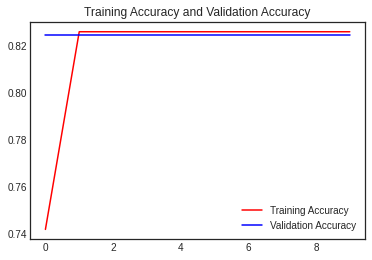

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training Accuracy and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes)

    for row in classes:
        prediction_list = row.tolist()
        if prediction_list[0] == 1:
            print('The image contains a person wearing the mask incorrectly')
        elif prediction_list[1] == 1:
            print('The image contains a person wearing the image properly')
        elif prediction_list[2] == 1:
            print('The image contains a person not wearing the image at all')

Saving face mask.jpg to face mask.jpg
[[0. 1. 0.]]
The image contains a person wearing the image properly


# Using Transferred Learning

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
                                input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None
)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print(f'Last layer output shape is: {last_layer.output_shape}')
last_output = last_layer.output

--2021-03-29 22:51:19--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  36.9MB/s    in 2.3s    

2021-03-29 22:51:22 (36.9 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Last layer output shape is: (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(3, activation='sigmoid')(x)

tl_model = Model(pre_trained_model.input, x)

tl_model.compile(optimizer=SGD(lr=0.01),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
tl_history = tl_model.fit(
                    train_generator,
                    steps_per_epoch=len(training_images)/32,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=len(testing_images)/32)

Epoch 1/15
17/17 [==============================] - 37s 2s/step - loss: 0.4912 - accuracy: 0.7014 - val_loss: 0.4231 - val_accuracy: 0.8245
Epoch 2/15
17/17 [==============================] - 33s 2s/step - loss: 0.4004 - accuracy: 0.8299 - val_loss: 0.3894 - val_accuracy: 0.8286
Epoch 3/15
17/17 [==============================] - 33s 2s/step - loss: 0.4075 - accuracy: 0.7902 - val_loss: 0.3883 - val_accuracy: 0.8327
Epoch 4/15
17/17 [==============================] - 33s 2s/step - loss: 0.3539 - accuracy: 0.8299 - val_loss: 0.3662 - val_accuracy: 0.8490
Epoch 5/15
17/17 [==============================] - 33s 2s/step - loss: 0.3484 - accuracy: 0.8208 - val_loss: 0.3609 - val_accuracy: 0.8571
Epoch 6/15
17/17 [==============================] - 33s 2s/step - loss: 0.3508 - accuracy: 0.8442 - val_loss: 0.3699 - val_accuracy: 0.8490
Epoch 7/15
17/17 [==============================] - 33s 2s/step - loss: 0.3433 - accuracy: 0.8560 - val_loss: 0.3496 - val_accuracy: 0.8571
Epoch 8/15
17/17 [==

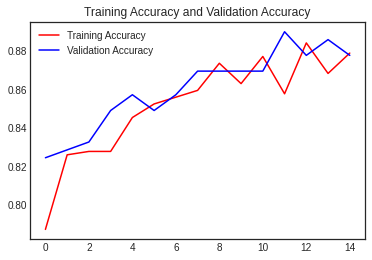

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = tl_history.history['accuracy']
val_acc = tl_history.history['val_accuracy']
loss = tl_history.history['loss']
val_loss = tl_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training Accuracy and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = tl_model.predict(images, batch_size=10)
    print(classes)

    for row in classes:
        prediction_list = row.tolist()
        if prediction_list[0] == max(prediction_list):
            print('The image contains a person wearing the mask incorrectly')
        elif prediction_list[1] == max(prediction_list):
            print('The image contains a person wearing the image properly')
        elif prediction_list[2] == max(prediction_list):
            print('The image contains a person not wearing the image at all')

Saving face mask.jpg to face mask (1).jpg
[[5.8398575e-10 1.0000000e+00 3.3182754e-20]]
The image contains a person wearing the image properly
